## <center> Mathematical Foundations </center>
## <center> MFE Spring 2021 </center>
## <center> Assignment 4 </center>
<center>Student Name: Rick Wuebker
<center>ID: richard_wuebker
<center> Solved in team: No

# 1. Black-Scholes PDE
><b>In a market where Black-Scholes assumptions are satisfied, an asset makes the followiing terminal payoff:</b>

><center>$f(S(t), t) = S(T)^2$, $n > 1$</center>
    
><b>Where S(t) is the value of the underlying stock at time T. The asset's value if the stock price reaches zero is $P(0, t) = 0$</b>
    
><b>(a) Show that the price of this power asset at $0 < t \leq T$ is:</b>

>$$ P(S(t), t) = e^{[(n-1)r + \frac{n(n-1)\sigma^2}{2}](T-t)}S(t)^n$$

<center>Law of motion: $P_t + rSP_s + \frac{\sigma^2}{2}S^2P_{ss} - rP = 0$</center>

<center>(i) First verify the solution above satisfies to the law of motion.</center> 

<center> Let $z = [(n-1)r + \frac{n(n-1)\sigma^2}{2}]$ </center>

$$ P_t = -ze^{[(n-1)r + \frac{n(n-1)\sigma^2}{2}](T-t)}S(t)^n = -zP $$

$$ P_s = ne^{[(n-1)r + \frac{n(n-1)\sigma^2}{2}](T-t)}S(t)^{n-1} $$

$$P_{ss} = n(n-1)e^{[(n-1)r + \frac{n(n-1)\sigma^2}{2}](T-t)}S(t)^{n-2}$$

<center>Plugging into the law of motion: </center>

$$ -zP + rSne^{[(n-1)r + \frac{n(n-1)\sigma^2}{2}](T-t)}S(t)^{n-1} + \frac{\sigma^2}{2}S^2 n(n-1)e^{[(n-1)r + \frac{n(n-1)\sigma^2}{2}](T-t)}S(t)^{n-2} - rP  = 0$$

$$ -[(n-1)r + \frac{n(n-1)\sigma^2}{2}]P + rnP + \frac{\sigma^2}{2}n(n-1)P - rP  = 0$$

$$\frac{\sigma^2}{2}n(n-1)P  - \frac{\sigma^2}{2}n(n-1)P + rP(n-1) - rP(n-1) = 0$$

$$ 0 = 0$$

<center>(ii) Verify the terminal condition and boundary condition.</center> 

<center> Terminal condition: $P(S(T), T) = e^{[(n-1)r + \frac{n(n-1)\sigma^2}{2}](T-T)}S(T)^n = S(T)^n = f(S(T))$ </center>

<center>Boundary condition: $P(0, t) = e^{[(n-1)r + \frac{n(n-1)\sigma^2}{2}](T-t)}0^n = 0$ </center>

<center>This formula for price above satisfies the Black-Scholes PDE including boundary conditions and thus is a valid price of the power asset. </center>

# 2. Finite Difference Method for Black-Scholes PDE
><b>(a) Write a PDE for the price of the double knock out option.</b>


<center>Black-Scholes PDE: $ P_t + rSP_s + \frac{\sigma^2}{2}S^2 P_{ss} - rP = 0 $</center>  

<center> Let $s = T-t$ and let $x = \ln(S)$</center>

$$ \frac{ds}{dt} = -1 \;\;\;\;\;\;\; \frac{dx}{dS} = S^{-1} \;\;\;\;\;\; \frac{d^2 x}{dS^2} = -S^{-2}$$

$$ P_t = \frac{dP}{dt}\frac{dt}{ds} = -P_s $$

$$ P_s = \frac{dP}{dx}\frac{dx}{dS} = P_x S^{-1} $$

$$P_{ss} = \frac{d^2P}{dx^2}\bigg(\frac{dx}{dS}\bigg)^2 + \frac{dP}{dx}\frac{d^2 x}{dS^2} = P_{xx}S^{-2} + -P_x S^{-2}  = S^{-2}(P_{xx} -P_x)$$

<center>Plugging into the Black-Scholes PDE: </center>

$$-V_s + rV_x + \frac{\sigma^2}{2}(V_{xx} - V_x) - rV = 0 $$

$$ V_s = (r - \frac{\sigma^2}{2})V_x + \frac{\sigma^2}{2}V_{xx} - rV $$

<center>Boundary conditions: </center>

$$P(50, t) = 0 \implies V(ln(50), s) = V(3.9120, s) = 0$$   

$$P(100, t) = 0 \implies V(ln(100), s) = V(4.6052, s) = 0$$

<center>Initial $x_0 \in (3.9120, 4.6052)$</center>

<center>If x never touched or went beyond the lower and upper endpoints of (ln(50), ln(100)) then $V(x, 0) = (e^x - 50)(100 - e^x)$</center> 

><b>(b) Implement a finite difference using the finite difference method with operators:</b>

> $ D_{+s} = \frac{w_n^{m+1} - w_n^m}{\Delta s} 
\;\;\;\;\;\;\;\;\;\;\; D_{0 x} = \frac{w_{n+1}^m - w_{n-1}^m}{2\Delta x}
\;\;\;\;\;\;\;\;\;\;\; D_{+ x}D_{- x} = \frac{w_{n+1}^m - 2w_n^m + w_{n-1}^m}{(\Delta x)^2}$ 

$$\frac{w_n^{m+1} - w_n^m}{\Delta s} = a\frac{w_{n+1}^m - w_{n-1}^m}{2\Delta x} + b\frac{w_{n+1}^m - 2w_n^m + w_{n-1}^m}{(\Delta x)^2} + cw_n^m$$

<center>Where $a = r - \frac{\sigma^2}{2}$, $b = \frac{\sigma^2}{2}$, and $c = -r$</center>

$$ \implies w_n^{m+1} = \Delta sa\frac{w_{n+1}^m - w_{n-1}^m}{2\Delta x} + \Delta sb\frac{w_{n+1}^m - 2w_n^m + w_{n-1}^m}{(\Delta x)^2} + w_n^m(\Delta sc  + 1)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

In [2]:
def finite_difference_solver(M, N):
    sigma = 0.40
    T = 1.00
    r = 0.05
    
    a = r - (sigma**2)/2
    b = (sigma**2)/2
    c = -r
    
    x_min = np.log(50)
    x_max = np.log(100)
    s_min = 0
    s_max = T
    x_range, dx = np.linspace(x_min, x_max, N, retstep=True)
    s_range, ds = np.linspace(s_min, s_max, M, retstep=True)
    
    V = np.zeros((M,N))
    V[0,:] = (np.exp(x_range) - 50) * (100 - np.exp(x_range))
    for m_ix, m in enumerate(s_range):
        if m_ix == len(s_range) - 1:
            continue
        for n_ix, n in enumerate(x_range):
            if n_ix == 0:
                V[m_ix, n_ix] = 0 # lower boundary condition
                continue
            if n_ix == len(x_range) - 1:
                V[m_ix, n_ix] = 0 # upper boundary condition
                continue
                
            prev_left = V[m_ix, n_ix - 1]
            prev_right = V[m_ix , n_ix + 1]
            prev_center = V[m_ix, n_ix]
            
            V[m_ix+1, n_ix] = ds*a*(prev_right - prev_left)/(2*dx) + ds*b*(prev_right - 2*prev_center + prev_left)/(dx**2) + prev_center*(ds*c + 1)
            
    return V, x_range, s_range
            

><b>(c) Solution, using the ratio between time and space step length $k = \frac{\Delta s}{\Delta x^2} = 2$ calculate the approximate solution at $t = 0$ with $\Delta x = 100$ points.</b>

In [3]:
N = 100
k = 2
x_range, dx = np.linspace(np.log(50), np.log(100), N, retstep=True)
ds = k * dx**2
M = int(round(1/ds))

V, x_range, s_range = finite_difference_solver(M, N)

><b>Please include plots of V(x,0), V(x,1) and P(S,0) and P(S,1)</b>

Text(0.5, 1.0, 'V(x, s=T-t=0) - Expiration')

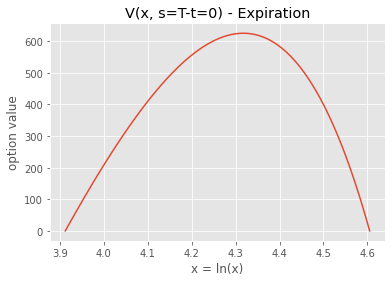

In [4]:
plt.plot(x_range, V[0,:])
plt.xlabel('x = ln(x)')
plt.ylabel('option value')
plt.title('V(x, s=T-t=0) - Expiration')


Text(0.5, 1.0, 'V(x, s=T-t=1)')

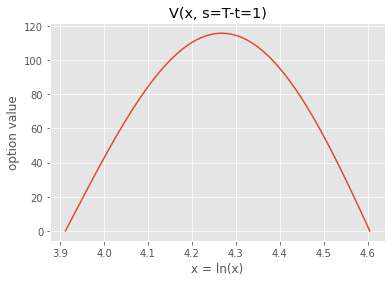

In [5]:
plt.plot(x_range, V[-1,:])
plt.xlabel('x = ln(x)')
plt.ylabel('option value')
plt.title('V(x, s=T-t=1)')

Text(0.5, 1.0, 'P(S, 1)')

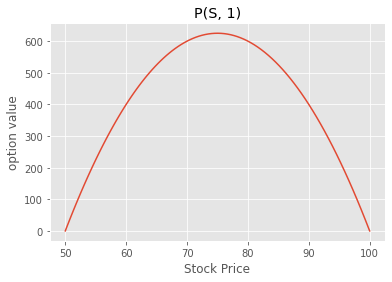

In [6]:
plt.plot(np.exp(x_range), V[0,:])
plt.xlabel('Stock Price')
plt.ylabel('option value')
plt.title('P(S, 1)')

Text(0.5, 1.0, 'P(S, 0)')

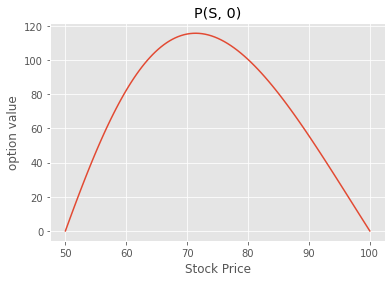

In [7]:
plt.plot(np.exp(x_range), V[-1,:])
plt.xlabel('Stock Price')
plt.ylabel('option value')
plt.title('P(S, 0)')

><b>Where does the value (in x coordinates) reach its maximum?</b>

In [8]:
np.max(V)

624.9978285903697

In [9]:
np.where(V > 624.99)

(array([0]), array([58]))

In [10]:
np.exp(x_range[58])

75.04659838656227

<center>The option value reaches its maximum where $t = T$ and $S \approx 75.0466$</center>

><b>The maximum value of the payouts, P(S,T) is reached at $S = 75$. Why do you think the maximum value at P(S,0) is reached at a different value of S?</b>

<center>My guess would be that the model is assuming the stock has a mean return of r = 0.05, so 75 discounted by the risk free rate is close to the max value of the option at time t = 0.</center>

In [11]:
present_val = 75*np.exp(-0.05)
print(present_val)

max_initial = np.argmax(V[-1,:])
print(np.exp(x_range[51]))

71.34220683755355
71.45721119367047


><b>(d) Stability: Vary k. How large can k be while keeping the approximation method stable?</b>

Last successful k =  6.199999999999994


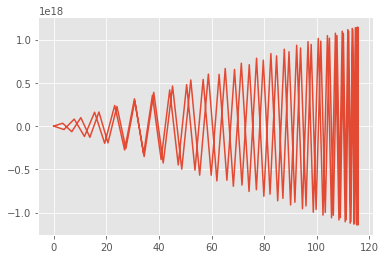

In [12]:
def get_time_points(k, N):
    x_range, dx = np.linspace(np.log(50), np.log(100), N, retstep=True)
    ds = k * dx**2
    M = int(round(1/ds))
    return M

def test_k(k, N):
    V, _, _ = finite_difference_solver(get_time_points(k, N), N)
    while(True):
        k = k + 0.1
        V_star, x_range, s_range = finite_difference_solver(get_time_points(k, N), N)
        try:
            assert np.allclose(V_star[-1, :], V[-1, :], atol=1e+00)
        except Exception as e:
            print('Last successful k = ', k-0.1)
            plt.plot(V[-1,:], V_star[-1,:])
            break

test_k(2.0, 100)

<center>In my test I checked up to the difference in V(S,0) between k = 2 and the varying k and stopping when the difference was outside of a point. Then making sure the plot showed that the solution had diverged. The max K that had a successful run was $k \approx 6.2$. </center> 

><b>Does this bound on K depend on $\Delta x$?</b>

<center>Trying a couple different $\Delta x$: </center>

Last successful k =  6.199999999999994


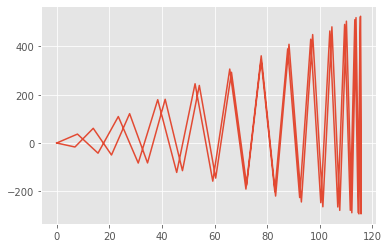

In [13]:
test_k(2.00, 50)

Last successful k =  6.199999999999994


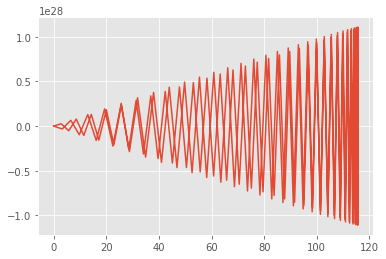

In [14]:
test_k(2.00, 120)

<center>After trying mulitple $\Delta x$ values it seems that k does  not depend on the value of $\Delta x$.</center>

><b>(e) Order of Convergence: Vary $\Delta x$ keeping $k = \frac{1}{4}$ constant. Estimate the order of convergence of the approximation method to the true solution.</b>

slope:  -1.9978693965889165


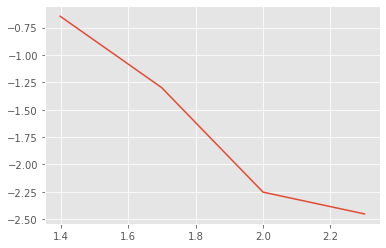

In [15]:
def test_dx():
    # Get best approximation values
    k = 2
    N = 200
    M = get_time_points(k, N)
    V, true_x_range, _ = finite_difference_solver(M,N)
    true_vector = V[-1,:]
    
    # now record and print the slope of the different sup norm errors against the N values
    k = 0.25
    log_n = []
    log_e = []
    for i in [25, 50, 100, 200]:
        log_n.append(np.log10(i))
        M = get_time_points(k, i)
        V1, x_range, _ = finite_difference_solver(M, i)
        interp_vector = np.interp(true_x_range, x_range, V1[-1,:])
        e = np.max(np.abs(true_vector - interp_vector))
        log_e.append(np.log10(e))

    plt.plot(log_n, log_e)
    slope = (log_e[3] - log_e[0]) / (log_n[3] - log_n[0])
    print('slope: ', slope)
    
test_dx()

<center>The slope of the above line is $\approx -1.9978$ so the estimated order of convergence is $\approx 2$</center>